## References

- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/timeseries.html
- https://www.statology.org/seaborn-time-series/
- 

# Assignment 6
## Knock airport Weather
Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month
- 60% of the marks will be given for the above

- For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)
- You do not need to over comment your code. Marks will be given for how nice the plots are.

In [14]:
# importing dependencies

import pandas as pd
import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings    # importing python warning module
sns.set_theme()            #setting seaborn as default style for plots when using matplotlib

## Loading the dataset

In [15]:
# Read in the data
# Low_memory false was used due to the mixed data type in some columns
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


## Data Exploration

In [16]:
# Displaying the total number of rows and columns
df.shape

(248394, 21)

In [17]:
df.head(5) #displays the first 5 rows

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [18]:
df.tail(5) #displays the last 5 rows

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8
248393,01-dec-2024 00:00,0,0.8,0,0.0,0,0.0,0.0,6.1,100,...,2,12,2,190,,,0.0,,0,8


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

# Data Manipulation

#### Missing Values
Pandas isnull was used to check for missing values and no missing values were detected as this does not recognize empty cells as missing values. However the assignment instruction mentioned the presence of missing values in the windspeed column. Checking for unique values in the windspeed column showed that the missing values weRe not represented as NAN but rather empty spaces. 

In [20]:
# Check for missing values
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [21]:
# Checking for the uniques values in the windspeed column
df['wdsp'].unique()

array(['0', '6', '8', '9', '7', '11', '13', '12', '14', '10', ' ', '4',
       '5', '3', '2', '15', '16', '17', '18', '19', '1', '20', '23', '21',
       '22', '24', '25', '28', '26', '29', '31', '32', '35', '33', '27',
       '30', '39', '37', '36', '38', '34', '42', '49', '50', '48', '43',
       '40'], dtype=object)

In [31]:
# Find and replace empty strings with NaN using regular expression
df_clean = df.replace(r'^\s*$', np.nan, regex=True)


In [32]:
# Rechecking for missing values
df_clean.isnull().sum()

ind              0
rain            49
ind.1            0
temp             0
ind.2            0
wetb             0
dewpt            0
vappr            0
rhum             0
msl             18
ind.3            0
wdsp            50
ind.4            0
wddir           52
ww           55486
w            55487
sun              0
vis          62581
clht            18
clamt           18
wdsp_NAN    248394
dtype: int64

## Handling

In [27]:
# Convert the date column to datetime as the original dataframe for the date is of type object
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\great\AppData\Local\Temp\ipykernel_22872\1708437680.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248389   2024-11-30 20:00:00
248390   2024-11-30 21:00:00
248391   2024-11-30 22:00:00
248392   2024-11-30 23:00:00
248393   2024-12-01 00:00:00
Name: date, Length: 248394, dtype: datetime64[ns]

In [28]:
# Set the index to the timeseries
df.set_index('date', inplace=True)


c:\Users\great\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


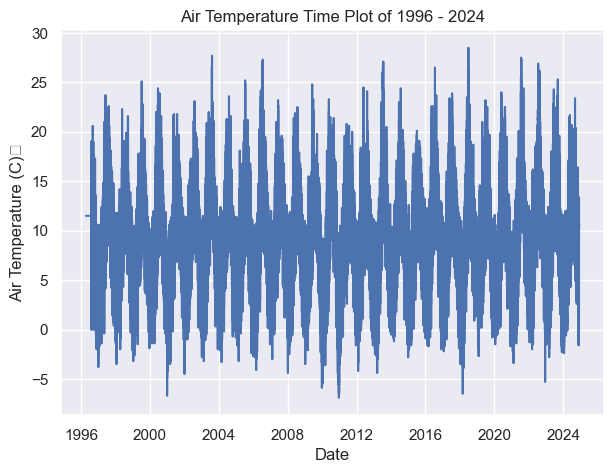

In [29]:
# Time plot of temperature
plt.figure(figsize=(7, 5)) 
plt.plot(df['temp'])
plt.xlabel('Date') 
plt.ylabel('Air Temperature (C)	') 
plt.title('Air Temperature Time Plot of 1996 - 2024') 
plt.grid(True) 
plt.show() 


c:\Users\great\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


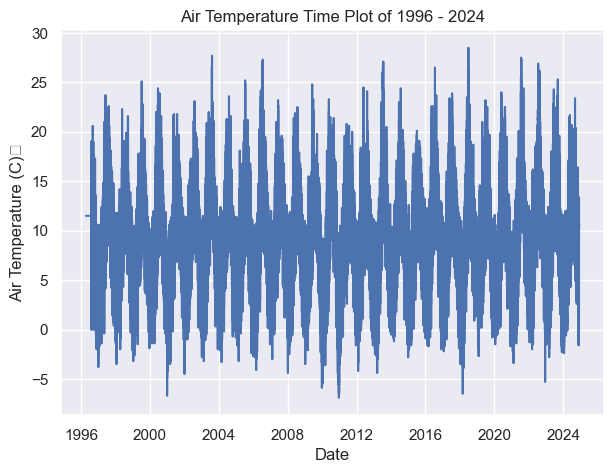

In [30]:
# Time plot of temperature
plt.figure(figsize=(7, 5)) 
sns.lineplot(data=df, x='date', y='temp')
plt.xlabel('Date') 
plt.ylabel('Air Temperature (C)	') 
plt.title('Air Temperature Time Plot of 1996 - 2024') 
plt.grid(True) 
plt.show() 
